In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle

LABELS = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [3]:
dataset = pd.read_csv('IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
features = dataset.drop('species', axis=1).to_numpy()

target = dataset['species'].replace(LABELS).to_numpy()

# Standard Scaler
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(features)

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_feature, target, test_size=0.2, stratify=target, shuffle=True, random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_11836\2143217640.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = dataset['species'].replace(LABELS).to_numpy()


In [9]:
# Training
logReg = LogisticRegression(class_weight='balanced')
logReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [11]:
# Ecaluation
pred = logReg.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [16]:
# Model saving
#1. Scaler
with open("Best_model/standard_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

#2. Model
with open("Best_model/reg_logistic_model.pkl", "wb") as file:
    pickle.dump(logReg, file)

## Prediction Pipeline

In [23]:
import pickle
LABELS = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

user_input = np.array([[5.55, 3.02, 1.9, 0.77]])

In [20]:
def get_save_file(file_path:str):
    with open(file_path, "rb") as file:
        output = pickle.load(file)

    return output

In [30]:
best_scaler = get_save_file("Best_model/standard_scaler.pkl")
best_model = get_save_file("Best_model/reg_logistic_model.pkl")

In [24]:
model_output = best_model.predict(
    best_scaler.transform(
        user_input
    )
)

In [25]:
model_output

array([1], dtype=int64)

In [29]:
user_output = LABELS[model_output[1]]
print(user_output)

IndexError: index 1 is out of bounds for axis 0 with size 1

# Deploying a ML Model

## 1. Stand-alone Deployment
- Streamlit

## 2. API based
- Micro Service Based

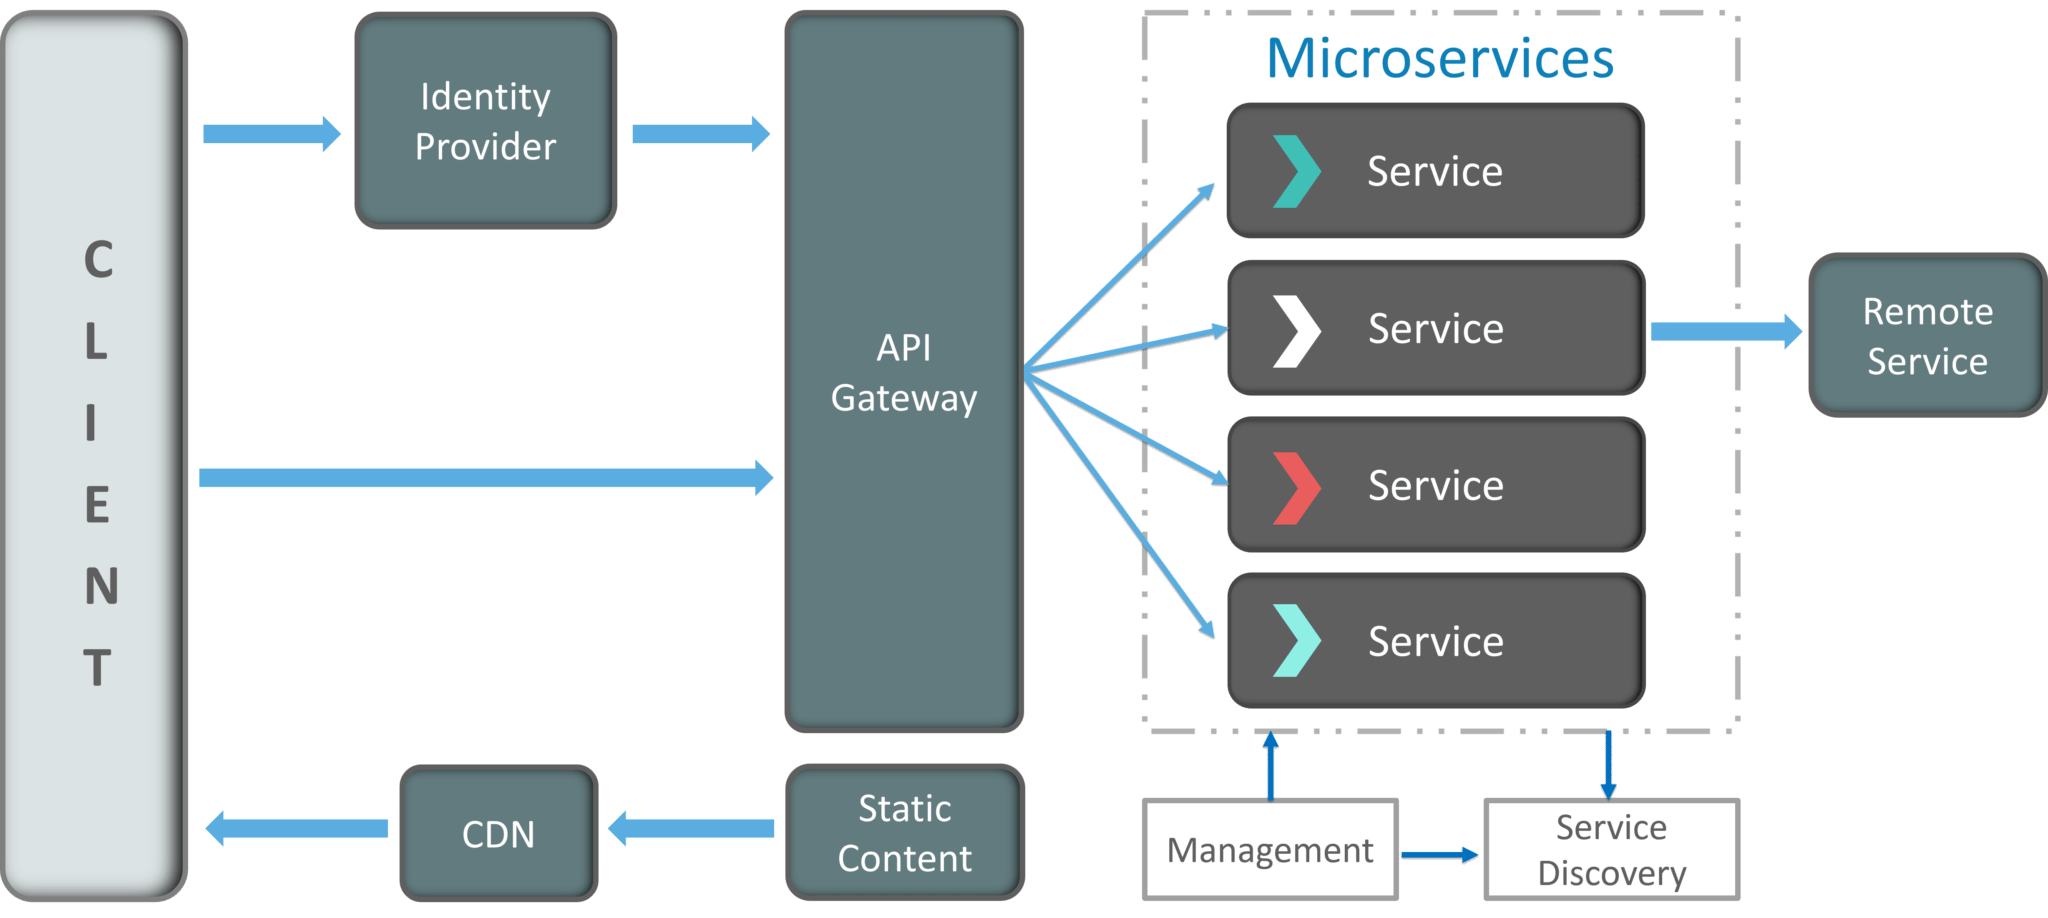

The microservices API model is an architectural style where an application is composed of small, independently deployable services, each running its own process and communicating with lightweight mechanisms such as HTTP/REST or messaging queues. Each service is responsible for a specific business function and can be developed, deployed, and scaled independently.

Key characteristics of a microservices API model include:

- Decomposition: The application is broken down into smaller, manageable services, each focusing on a specific task or business capability.
- Independence: Each microservice can be developed, deployed, and scaled independently, allowing for greater agility and flexibility.
- Polyglotism: Microservices can be implemented using different programming languages, frameworks, and data storage technologies, based on the requirements of each service.
- Resilience: Since microservices are independent, failures in one service do not necessarily impact the entire application. Services can be designed to be resilient, with built-in fault tolerance and redundancy.
- Scalability: Microservices can be scaled horizontally (by adding more instances of a service) or vertically (by upgrading the hardware of a service) based on the demand for that particular service.
- Ease of deployment: Microservices can be deployed using containerization technologies like Docker, which encapsulate the service and its dependencies, making deployment more consistent and reliable.
- API-driven: Communication between microservices is typically done via APIs, often using lightweight protocols like HTTP/REST or messaging queues.

Overall, the microservices API model enables organizations to build complex, scalable applications that are more flexible, resilient, and easier to maintain compared to traditional monolithic architectures. However, it also introduces challenges such as managing inter-service communication, ensuring data consistency across services, and maintaining a coherent overall architecture.

In [1]:
Webframework to connect 

SyntaxError: invalid syntax (3384321300.py, line 1)